# Random Forests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Data Manipulation

In [2]:
maldata=pd.read_csv('../../Data/malware.csv',sep='|')
print(maldata.head(1))

x=maldata.drop(['Name', 'md5', 'legitimate'], axis=1).values
y=maldata['legitimate'].values

print(x.shape)
feature_select_model=ExtraTreesClassifier()
feature_select_model.fit(x,y)
model = SelectFromModel(feature_select_model, prefit=True)
x=model.transform(x)
print(x.shape)

number_of_samples=len(y)

random_indices=np.random.permutation(number_of_samples)

num_train=int(number_of_samples*0.7)
num_test=int(number_of_samples*0.30)

x_train=x[random_indices[:num_train]]
y_train=y[random_indices[:num_train]]

x_test=x[random_indices[num_train:]]
y_test=y[random_indices[num_train:]]

          Name                               md5  Machine  \
0  memtest.exe  631ea355665f28d4707448e442fbf5b8      332   

   SizeOfOptionalHeader  Characteristics  MajorLinkerVersion  \
0                   224              258                   9   

   MinorLinkerVersion  SizeOfCode  SizeOfInitializedData  \
0                   0      361984                 115712   

   SizeOfUninitializedData     ...      ResourcesNb  ResourcesMeanEntropy  \
0                        0     ...                4              3.262823   

   ResourcesMinEntropy  ResourcesMaxEntropy  ResourcesMeanSize  \
0             2.568844             3.537939             8797.0   

   ResourcesMinSize  ResourcesMaxSize  LoadConfigurationSize  \
0               216             18032                      0   

   VersionInformationSize  legitimate  
0                      16           1  

[1 rows x 57 columns]
(138047, 54)
(138047, 11)


## Random Forrest

In [3]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

y_predtrain=model.predict(x_train)
print("Train Accuracy:",metrics.accuracy_score(y_train,y_predtrain)*100)

y_predtest=model.predict(x_test)
print("Test Accuracy:",metrics.accuracy_score(y_test,y_predtest)*100)

('Train Accuracy:', 99.948257306068371)
('Test Accuracy:', 99.246649764578052)


## Null Accuracy

In [4]:
print(max(y_test.mean(), 1 - y_test.mean())*100)

69.8659905831


## Confusion Matrix

In [5]:
confusion=confusion_matrix(y_test,y_predtest)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

# Accuracy
print('Accuracy:',(TP+TN)/float(TP+TN+FP+FN)*100)

#Misclassification
print('Misclassification:',(FP+FN)/float(TP+TN+FP+FN)*100)

#Sensitivity
print('Sensitivity:',(TP)/float(TP+FN)*100)

#Specificity
print('Specificty:',(TN)/float(TN+FP)*100)

#Flase Positive Rate
print('False Positive:',(FP)/float(TN+FP)*100)

#Precision Score
print('Precision Score:', (TP)/float(TP+FP)*100)


('Accuracy:', 99.246649764578052)
('Misclassification:', 0.75335023542194857)
('Sensitivity:', 98.830128205128204)
('Specificty:', 99.4263003283221)
('False Positive:', 0.5736996716778987)
('Precision Score:', 98.671999999999997)


## ROC AUC

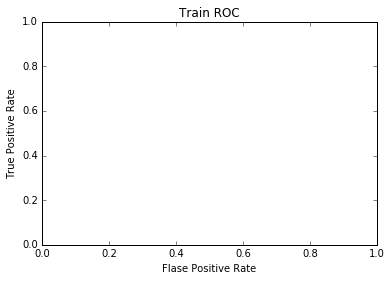

('Train AUC:', 99.932246718100131)


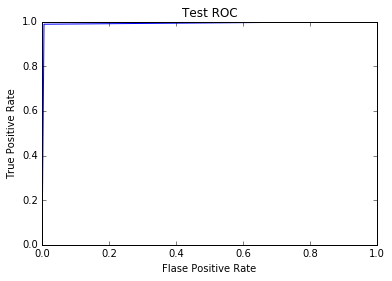

('Test AUC:', 99.128214266725152)
('Mean Cross-Val AUC Score:', 99.050991315912796)


In [6]:
fpr,tpr,threshold=metrics.roc_curve(y_train,y_predtrain)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC')
plt.show()

print("Train AUC:",metrics.roc_auc_score(y_train,y_predtrain)*100)



fpr,tpr,threshold=metrics.roc_curve(y_test,y_predtest)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC')
plt.show()

print("Test AUC:",metrics.roc_auc_score(y_test,y_predtest)*100)



print("Mean Cross-Val AUC Score:",cross_val_score(model, x, y, cv=10, scoring='roc_auc').mean()*100)

# Tuning 

1) n_estimators: Number of decision trees to be used. Between 500-1000.

2) max_features: Maximim number of features random forrest can select for training

3) min_sample_leaf: Minimum number of samples in newly created trees.

In [7]:
param_grid={
    
    "n_estimators" : [100,300],
    "max_features" : [3,4,7],
    "min_samples_leaf" : [40,50,60]
}

In [8]:
tuned_classifier=GridSearchCV(model,param_grid,cv=10,scoring='accuracy')
tuned_classifier.fit(x,y)

print(tuned_classifier.best_score_)
print(tuned_classifier.best_params_)
print(tuned_classifier.best_estimator_)

0.982223445638
{'max_features': 3, 'n_estimators': 100, 'min_samples_leaf': 50}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### Train model with best parameters

In [9]:
model=RandomForestClassifier(**tuned_classifier.best_params_)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Results

In [10]:
y_predtrain=model.predict(x_train)
print("Train Accuracy:",metrics.accuracy_score(y_train,y_predtrain)*100)

y_predtest=model.predict(x_test)
print("Test Accuracy:",metrics.accuracy_score(y_test,y_predtest)*100)

('Train Accuracy:', 98.962041559731759)
('Test Accuracy:', 98.891705903658107)


In [11]:
confusion=confusion_matrix(y_test,y_predtest)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

# Accuracy
print('Accuracy:',(TP+TN)/float(TP+TN+FP+FN)*100)

#Misclassification
print('Misclassification:',(FP+FN)/float(TP+TN+FP+FN)*100)

#Sensitivity
print('Sensitivity:',(TP)/float(TP+FN)*100)

#Specificity
print('Specificty:',(TN)/float(TN+FP)*100)

#Flase Positive Rate
print('False Positive:',(FP)/float(TN+FP)*100)

#Precision Score
print('Precision Score:', (TP)/float(TP+FP)*100)

('Accuracy:', 98.891705903658107)
('Misclassification:', 1.108294096341905)
('Sensitivity:', 98.4375)
('Specificty:', 99.087610160705026)
('False Positive:', 0.91238983929497142)
('Precision Score:', 97.8962467128855)


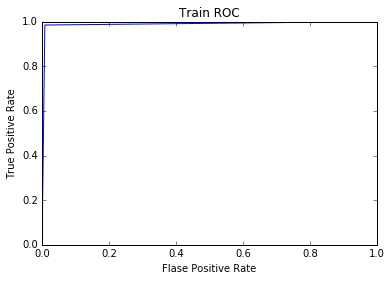

('Train AUC:', 0.98819003006276784)


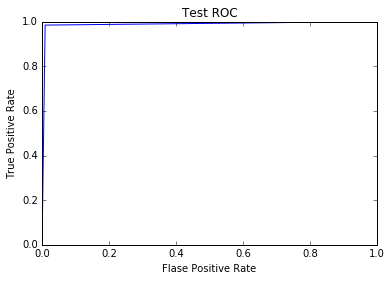

('Test AUC:', 0.9876255508035251)


In [12]:
fpr,tpr,threshold=metrics.roc_curve(y_train,y_predtrain)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC')
plt.show()

print("Train AUC:",metrics.roc_auc_score(y_train,y_predtrain))



fpr,tpr,threshold=metrics.roc_curve(y_test,y_predtest)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC')
plt.show()

print("Test AUC:",metrics.roc_auc_score(y_test,y_predtest))